# 10.1. Intro

### 10.1.3. 퍼셉트론
- 가장 간단한 인공 신경망 구조중 하나로, TLU나 LTU라고 부르는 인공 뉴런을 기반으로함
- 입력과 출력이 T/F가 아닌 숫자이고 각각의 입력 연결은 가중치와 연관되어있음
- TLU는 입력의 가중치 합을 계산
    - z = w1x1 + ... + wnxn = x'w
- 그 다음 step function을 적용하여 결과를 출력함
    - h_w(x) = step(z), z = x'w
    - 가장 널리 사용되는 step function은 heavyside step function
        - *이따금 sign fuction을 이용하기도 함*
    - heavyside(z) = 1(if z >= 0) or 0(if z < 0)
    - sign(z) = 1(if z > 0) or 0(if z = 0), -1(if z < 0)
- 하나의 TLU는 선형이진분류에 사용할 수 있음
    - 입력의 선형 조합을 계산해서 그 결과가 임계값을 넘을 때 양성 클래스를 출력
    - TLU를 훈련한다는 것은 z = x'w에서 적절한 w벡터를 찾는 것
- 퍼셉트론은 층이 하나뿐인 TLU로 구성됨
- 한 층에 있는 뉴런이 이전 층의 모든 뉴런과 연결되었을 때 **Dense Layer**라고 부름
- 퍼셉트론의 입력은 **input neuron**이라고 불리는 특별한 통과 뉴런에 주입됨
    - 이 뉴런은 어떤 ㅣㅂ력이 주입되든 그냥 출력으로 통과시킴
    - **input layer**는 모두 입력 뉴런으로 구성되며 여기에 편향 특성이 더해짐(x0 = 1)
        - 일반적으로 편향특성은 항상 1을 출력하는 편향 뉴런으로 표현됨
    - 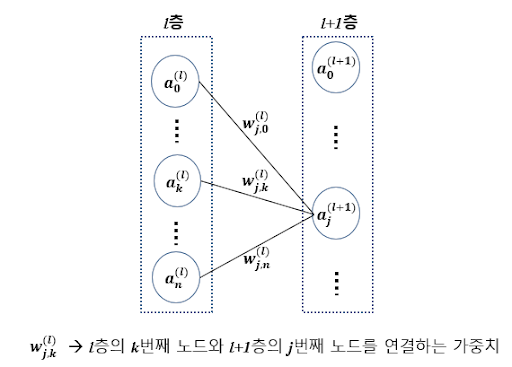
- 완전 연결층의 게산은 아래와같이 표현됨
    - h(w,b)(X) = pi(XW  + b)
        - X : 입력특성의 행렬
        - W : 편향 뉴런을 제외한 모든 연결 가중치를 표현함
        - b : 편향 벡터 - 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치를 포함함
            - 인공 뉴런 하나마다 하나의 편향값이 있음
        - pi : 활성화 함수 - TLU의 경우 Step function을 활성화함수로 씀
- 퍼셉트론의 학습 규칙은 다음과 같음
    - w(i,j)_new = w(i, j) + eta(yj - y_hat_j)xi
        - w(i, j) : i번째 입력 뉴런과 j번째 출력 뉴런 사이를 연결하는 가중치
        - xi : 현재 훈련 샘플의 i번째 뉴런의 입력값
        - yj_hat : 현재 훈련 샘플의 j번째 출력 뉴런의 출력값
        - y_j : 현재 훈련 샘플의 j 번째 출력 뉴런의 타겟값
        - eta : lr
- **퍼셉트론 수렴이론** : 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴함        

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([0])

- 로지스틱 회귀와 달리 퍼셉트론은 클래스 확률을 제공하지 않으며, 고정된 임게값을 기준로 예측을 만듦
    - 따라서 SGD 로지스틱 회귀와 퍼셉트론이 닮긴 했지만 로지스틱이 더 선호됨

### 10.1.4. 다층 퍼셉트론과 역전파
- 다층 퍼셉트론은 **입력층** 하나와 **은닉층**이라 불리는 하나 이상의 TLU층과 마지막 **출력층**으로 구성됨
    - 입력층과 가까운 층을 보통 하위층이라 부르며, 출력에 가까운 층을 보통 상위층이라고 부름
    - 출력층을 제외한 모든 층은 편향 뉴런을 포함하며 다음 층과 Dense하게 연결됨
    - 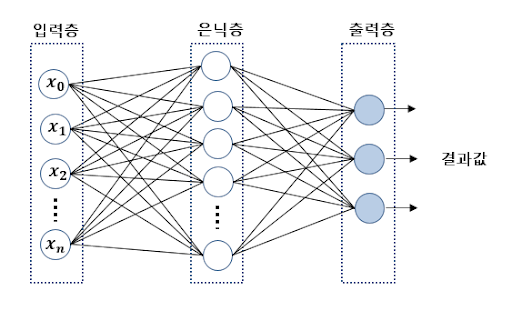

- 은닉층을 여러 개 쌓아올린 인공신경망을 DNN이라고 부름
    - 딥러닝은 심층 신경망을 연구하는 분야이며, 일반적으로는 연산이 연속하여 길게 연결된 모델을 연구함
- 위 그림에서는 입력 -> 출력 한 방향으로 흐름
    - 일종의 Feed Forward Neural net임
- **역전파**가 다층 퍼셉트론을 학습시키기 위해 등장함
    - 간단히 이야기하면, 효율적인 기법으로 그래디언트를 자동으로 계산하는 Gradient Descent방법론
    - 네트워크를 정방향 한 번, 역 방향 한 번, 즉 두번 통과하는 것만으로도 모델 파라메터에 대한 오차의 그래디언트를 계산할 수 있었음
        - 즉, 오차를 감소시키기 위해 각 연결 갖중치와 편향값을 개선할 수 있게 되었음
    - 그래디어트를 구하면 평범한 GD alg를 이용함
        - 전체 과정은 네트워크가 어떤 해결책으로 수렴될때 까지 반복함
    

- 예시를 통해 좀 더 살펴보자
- **정방향 계산**
    - 한 번에 32개의 샘플이 포함된 하나의 미니배치를 통해 전체 훈련 세트를 처리함
        - 그리고 이 과정을 n회 반복 --> n epochs
    - 각 미니배치는 네트워크의 입력층으로 전달되어 첫 은닉층으로 보내짐
        - 그리고 각 미니배치 내의 모든 샘플에 대해 해당 층에 있는 모든 뉴런의 출력을 계산
    - 그리고 이 결과는 다음 층으로 전달됨
    - 이 계산이 마지막 출력층의 출력을 계산할 때까지 계속 됨
    - 역방향 계산을 위해 중간 계산값을 모두 저장하게 되는데, 이 것 이외에는 FFN에서 예측을 만드는것과 일치함
    - 그 다음 네트워크의 출력 오차를 측정함
        - 즉, 손실함수를 사용하여 기대하는 출력과 네트워크의 실제 출력을 비교하고 오차 측정 값을 반환함
- **역방향 계산**
    - 각 출력 연결이 위에서 계산된 오차에 기여하는 정도를 미분의 연쇄법칙을 이용하여 빠르게 수행함
    - 또 다시 연쇄 법칙을 이용하여 이전 층의 연결 가중치가 이 오차의 기여정도에 얼마나 기여했는지 측정
    - 입력층에 도달할 때까지 역방향으로 연쇄 미분을 진행하여 오차에 미치는 영향을 계산
        - 즉 오차 그래디언트를거꾸로 전파하는 것
        - 그 결과 네트워크의 모든 연결 가중치에 대한 오차 그래디언트를 측정하게 됨
- **그래디언트 연산**
    - 결국 이렇게 계산된 오차 그래디언트를 이용하여 네트워크 내 모든 연결 가중치를 수정함
- **요약**
    - 각 훈련 샘플에 대한 역전파 알고리즘이 먼저 에측을 만들고 정방향 계산을 통해 오차를 측정
    - 그 다음 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정함
    - 마지막으로 이 오차가 감소하도록 가중치를 조정
    - 이 때 중요한 것은 은닉층의 연결 가중치를 랜덤하게 초기화하는 것


- 위 알고리즘을 잘 작동하게 하고자 step function을 Sigmoid로 변경
    - Sigmoid : sigma(z) = 1(1 + exp(-z))
- 계단 함수에는 수평선밖에 없으나 사실 계산할 그래디언트가 없었음
    - 반면, 로지스틱 함수는 어디서든지 0이 아닌 그래디언트가 잘 정의되어있음
        - *사실 역전파 알고리즘은 로지스틱 뿐 아니라, 다른 활성화 함수와도 사용될 수 있음*
- 가장 많이 사용되는 두 개의 활성화 함수는 다음과 같음
    - 1) Hyperbolic Tangent : tanh(z) = 2sigma(2z) - 1
        - 로지스틱함수처럼 S자 모양이며 연속적이며 미분 가능하나 출력범위가 -1 ~ 1로, 초기에 각 층의 출력을 원점 근처로 모으는 경향이 있음
    - 2) ReLU : max(0, z)
        - 연속적이지만 z = 0에서 미분되지 않음
            - z < 0일 경우 도함수는 0으로 설정함
        - 하지만, 실제로는 매우 잘 작동하고 계산 속도가 빨라 가장 기본적인 활성화함수가 됨
        - 출력값에 최댓값이 없다는 점이 경사하강법의 문제를 완화해줄 수 있음
- **활성화 함수의 필요성**
    - 선형 변환을 여러개 연결해도 결국 선형변환밖에 얻을 수 없음
    - 즉, 층 사이에 비선형성을 추가하지 않으면, 아무리 층을 쌓아도 하나의 층과 동일해짐
    - 반대로 비선형 활성화 함수가 있는 충분히 큰 DNN의 경우 이론적으로 어떠한 연속함수와도 근사할 수 있음
    - 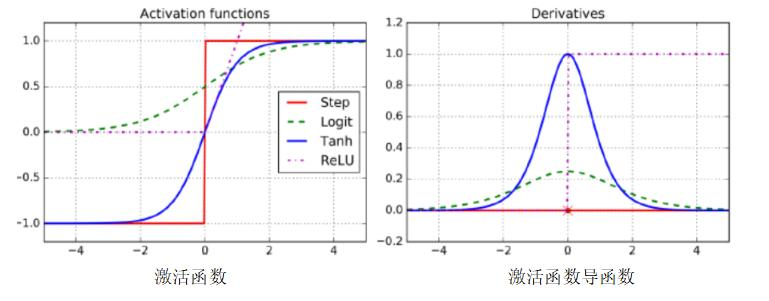

### 10.1.5. 회귀를 위한 다층 퍼셉트론
- 값 하나를 예측할 땐 출력 뉴런은 하나가 필요(인풋이 여러 차워너이더라도)
- 다변량 회귀에서는 출력 차원마다 출력 뉴런이 하나씩 필요함
- 일반적으로 회귀용 다층 퍼셉트론을 만들 때는 출력 뉴런에 활성화 함수를 사용하지 않고 어떤 범위의 값도 출력되도록 함
    - But 만약 출력이 항상 양수여야한다면 출력층에 ReLU를 쓸 수도 있음
- 아니면, 어떤 범위 안의 값을 예측하고 싶다면 로지스틱이나 하이퍼볼릭탄젠트를 쓰고 레이블의 스케일을 조정할 수 있음
- 회귀의 경우 보통 loss function으로 평균제곱오차를 이용함
    - 만약 훈련세트에 아웃라이어가 많다면 평균 절댓값오차를 이용할 수 있음
    - *혹은 이 둘을 조합한 후버 손실을 사용할 수도 있음*

### 10.1.6. 분류를 위한 다층 퍼셉트론
- 이진 분류라면 로지스틱 활성화 함수를 가진 하나의 출력 뉴런만 필요함
- 다층 레이블 이진분류 문제를 쉽게 처리할 수 있는게 다층 퍼셉트론
- 다중 분류 문제에서는 소프트맥스 함수를 출력층의 활성화 함수로 사용할 수 있음
- 분류의 경우 보통 loss function으로 cross-entropy를 이용함

# 10.2. 케라스로 다층 퍼셉트론 구현
- 케라스는 고수준 딥러닝 API
- 공식 고수준 API로 구글에서 채택되었으며, 케라스와 비슷함

### 10.2.2. Sequential 이용하여 분류하기
- 설명 최대한 생략하고 코드 위주로
- Fashion MNIST를 다뤄볼 것

##### 데이터 로딩 및 전처리

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_tr_full, y_tr_full), (X_t, y_t) = fashion_mnist.load_data()

In [5]:
X_tr_full.shape, y_tr_full.shape, X_t.shape, y_t.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full, test_size = 5000, random_state = 42)

In [8]:
X_tr = X_tr/255
X_val = X_val/255
X_t = X_t/255

In [9]:
class_names = ["T-shirts/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [10]:
class_names[y_tr[0]]

'Pullover'

##### 시퀀셜 활용 모델링 : add

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) #개별 이미지 행렬이 28 x 28, 입력 이미지를 1D배열로 반환
model.add(keras.layers.Dense(300, activation = 'relu')) #뉴런 수가 300개인 완전연결 은닉층
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #라벨이 10개

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


##### 시퀀셜 활용 모델링 : 레이어 리스트

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 층을 만들 때 이름을 지정하지 않으면 알아서 저렇게 번호를 매김
- 출력 크기의 None은 배치 크기에 어떤 값이 들어와도 된다는 의미
- 완전연결층은 보통 파라메터가 많음
    - 예를들어 첫 은닉층은 784 x 300개의 연결
        - 즉, 28x28픽셀이 펼쳐진 다음, 300개의 뉴런이 개별 연산되고, 각 뉴런마다 한 개의 편향
        - 그래서 28x28x300 + 300의 파라메터, 235500개의 파라메터가 계산됨

In [15]:
model.layers

- 개별 레이어에는 이렇게 접근 가능

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense_3'

- 각 층의 모든 파라메터는 선택된 레이어의 클래스에서 get_weights()메서드와 set_weights()메서드를 이용하여 접근 가능

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 0.03320473, -0.03907275, -0.01744245, ..., -0.01079164,
        -0.05772971, -0.07109027],
       [-0.01139774, -0.07309223,  0.04260866, ...,  0.00366913,
         0.00491676,  0.02627762],
       [ 0.06851795,  0.05316861,  0.05566776, ..., -0.06748081,
        -0.00021468, -0.01521202],
       ...,
       [-0.04605238, -0.05418299,  0.05693725, ..., -0.01141144,
        -0.0083902 , -0.06182231],
       [-0.0512732 ,  0.03652098, -0.07183364, ..., -0.04087014,
        -0.05229063,  0.02323855],
       [ 0.04592621, -0.0729926 , -0.05381961, ..., -0.0706211 ,
         0.02509887,  0.02486724]], dtype=float32)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

- 완전연결층은 연결 가중치를 무작위로 초기화하며, 편향은 0으로 초기화함
    - 다른 초기화 방식을 사용하고자 한다면, 층을 생성할 때 kernel_initializer와 bias_initializer 인자를 설정할 수 있음
- *가중치 행렬의 크기는 입력의 크기에 달려잇기 때문에 Sequential 모델에 첫 층을 추가할 때 input_shape매개변수를 지정한 것*
    - 물론 지정하지 않아도 좋다면, 입력의 크기를 알고있다면 지정하는 것이 좋음
    - summary, save등의 메서드가 작동하지 않음!!
        - 그래서 Kobert의 세이브가 안되었던것!!

In [21]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

- sparse_categorical_crossentropy를 이용한 것은 레이블이 하나의 정수로 이루어짐
    - 즉, [0, 1, 2, 3, 0, 1, 2, ...] 이런 식임
- 하지만 레이블이 0, 1, 2, 3, 4, ..., 10의 열을 가지고 있고, 0, 1로 이루어진 형태라면
    - 즉, 레이블별 확률값으로 표현된 원핫벡터라면 categorical_cross_entropy를 이용해야함
- 지금은 optimizer에 sgd를 사용했음
    - 즉, 훈련 방식을 sgd로 했다는 것이며, 이건 앞서 말했던 자동미분의 개념을 차용해오지는 않은것(아담 등이 자동미분 알고리즘)
    - 또한, 보통 learning_rate를 설정하기 위해 optimizer = keras.optimizers.SGD(lr = ???) 요런 식으로 학습률을 지정함

In [22]:
hist = model.fit(X_tr, y_tr, epochs = 30, validation_data = (X_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.7214 - accuracy: 0.7607 - val_loss: 0.5334 - val_accuracy: 0.8126
Epoch 2/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4884 - accuracy: 0.8309 - val_loss: 0.4922 - val_accuracy: 0.8160
Epoch 3/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4420 - accuracy: 0.8470 - val_loss: 0.4337 - val_accuracy: 0.8482
Epoch 4/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4141 - accuracy: 0.8569 - val_loss: 0.4342 - val_accuracy: 0.8414
Epoch 5/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3942 - accuracy: 0.8632 - val_loss: 0.3966 - val_accuracy: 0.8618
Epoch 6/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3758 - accuracy: 0.8686 - val_loss: 0.3967 - val_accuracy: 0.8620
Epoch 7/30
55000/55000 [==============================] 

In [23]:
hist.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [24]:
hist.epoch[:5]

[0, 1, 2, 3, 4]

In [25]:
hist.history["val_accuracy"][:5]

[0.8126, 0.816, 0.8482, 0.8414, 0.8618]

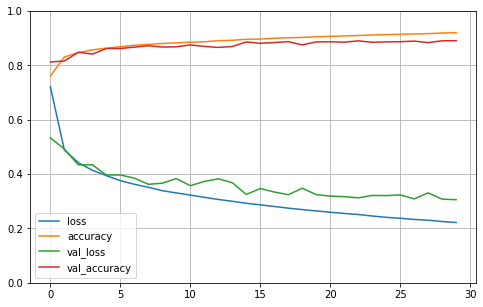

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- 케라스에서는 fit()메서드를 호출하면 중지되었던 곳 부터 다시 훈련을 이어갈 수 있음...!(이걸 몰랐네...)
- 성능 자체가 만족스럽지 않응면 하이퍼파라메터 튜닝을 해야함
    - 1) 학습률 : 다른 하이퍼파라메터를 바꿨다면 무적권 얘도 바꿔줘야함
    - 2) 옵티마이저 변경
    - 3) 층 갯수, 층 내 뉴런 수, 은닉층이 사용하는 활성화 함수 등 수정
    - 4) 배치 크기 : fit할 때 batch_size 인자로 지정할 수 이으며, 기본값은 32
- 만약 상업용으로 배포할 것이라면, 테스트 세트로 모델을 평가하여 일반화 오차를 추정해야함
    - 이 때 이용하는 것이 evaluate

In [27]:
model.evaluate(X_t, y_t)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32932230912446975, 0.885]

In [28]:
X_new = X_t[:3]
y_pred = model.predict(X_new)

In [29]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
X_new = X_t[:3]
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

### 10.2.3. Sequential 이용하여 회귀모델 만들기
- 설명 최대한 생략하고 코드 위주로
- 캘리포니아 주택가격 데이터를 다뤄볼 것

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [32]:
housing = fetch_california_housing()

x_tr, x_t, y_tr, y_t = train_test_split(housing.data, housing.target, test_size = 0.25, random_state = 42)
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size = 0.25, random_state = 42)

In [33]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(x_tr)
X_val = scaler.fit_transform(x_val)
X_t = scaler.fit_transform(x_t)

- 분류 모델과의 차이점
    - 출력층에 활성화 함수가 없는 하나의 뉴런만 가짐
    - 손실 함수로 MSE를 사용한다는 점
- *본 데이터에는 이상치가 많으므로 오버피팅을 막기 위해 뉴런수가 적은 은닉층 하나만 이용*

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_tr.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
hist = model.fit(X_tr, y_tr, epochs = 20, validation_data = (X_val, y_val))
mse_test = model.evaluate(X_t, y_t)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.7824 - val_loss: 0.5963
Epoch 2/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5505 - val_loss: 0.6460
Epoch 3/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5853 - val_loss: 0.4849
Epoch 4/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4262 - val_loss: 0.4601
Epoch 5/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4070 - val_loss: 0.4467
Epoch 6/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4013 - val_loss: 0.4516
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4256 - val_loss: 0.4347
Epoch 8/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3872 - val_loss: 0.4376
Epoch 9/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3806 - val_l

In [35]:
X_new = X_t[:3]
pred = model.predict(X_new)

In [36]:
pred

array([[0.7210005],
       [1.5772495],
       [4.5218277]], dtype=float32)

- Sequential은 확실히 이용하기 쉽고 널리 이용됨.
- 그러나 입출력이 여러개거나 더 복잡한 네트워크 토폴리지를 갖는 신경망을 만들어야할 때가 있음
    - 이럴 때 케라스에서 지원하는 **함수형 API**를 이용함

### 10.2.4. 함수형 API를 이용한 복잡한 모델링
- 순차적이지 않은 신경망의 대표적 살는 **와이드&딥 신경망
    - 입력이 전체적으로 모두 은닉층에 순차 입력되는 것이 아니라, 일부 입력은 바로 출력층에 연결되는 것
    - 이를 통해 깊은 층을 통한 복잡한 패턴 인식과 짧은 경로를 통한 간단한 규칙을 모두 학습시킬 수 있음
- 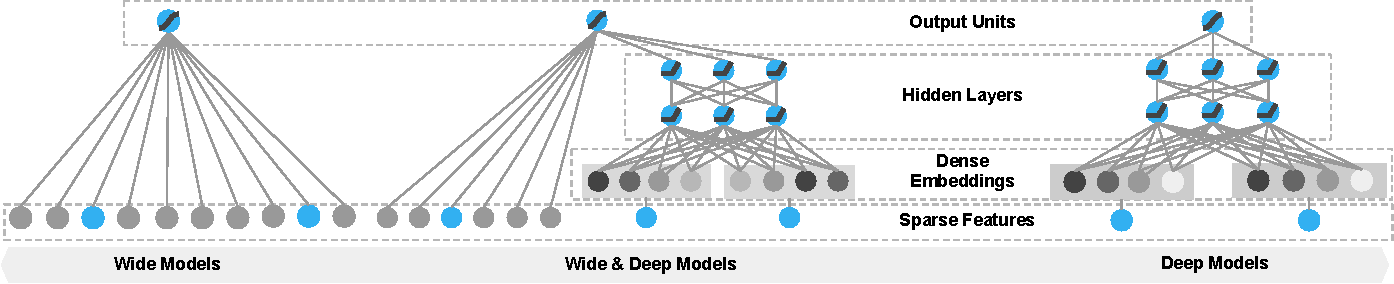

In [37]:
input_ = keras.layers.Input(shape = X_tr.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

- 우선 인풋 객체를 만들어야하며, 이 때 shape와 dtype을 포함하여 입력을 정의함
    - 한 모델이 여러개의 입력을 가질 수도 있음
- 30개의 뉴런과 Relu활성화함수를 가진 완전연결층을 만들고, 만들어지자마자 입력과 함께 함수처럼 호출 가능함
    - 따라서 함수형 API라고 부름
    - **케라스에 층이 연결되는 방법만 알려준 상태**
- 두 번째 은닉층을 만들고 또 연결
- 두 번째 은닉층의 출력과 입력을 **concatenate**층으로 연결함
- 마지막에는 사용할 입력과 출력을 다시 지정해줘야함
    - kobert에서는 inputs에 위에서 우선 input을 세 개 지정하고, 여기에 리스트형식으로 다 집어넣어줘야할 것으로 판단됨

In [38]:
model.compile(optimizer = "sgd", loss = "mean_squared_error")
hist = model.fit(X_tr, y_tr, epochs = 20, validation_data = (X_val, y_val))
mse_test = model.evaluate(X_t, y_t)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.8606 - val_loss: 0.5144
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4697 - val_loss: 0.4781
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4092 - val_loss: 0.4530
Epoch 4/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4049 - val_loss: 0.4510
Epoch 5/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3810 - val_loss: 0.4322
Epoch 6/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3726 - val_loss: 0.4264
Epoch 7/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3606 - val_loss: 0.4376
Epoch 8/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3595 - val_loss: 0.5384
Epoch 9/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3595 - val_l

- 만약 일부 특성은 짧은 경로로, 다른 특성들은 깊은 경로로 전달하고 싶다면?
    - 여러 방법이 있겠지만 한 가지 방법은 입력 자체를 여러개를 이용하는 것
        - kobert도 값 자체의 층이 세개니까, 이렇게 보내봐야할 듯
        - 대신 은닉층은 순서대로 들어가니까 따로 나눌 필요는 없을 듯
        - 완전연결층을 추가로 달아보자
    - 예를 들어 5개의 특성을 짧은 경로로 보내고 6개의 특성을 깊은 경로로 보낸다고 가정

In [39]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) #input A는 바로 concat층으로 쏴서 은닉층을 제낌
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

- *모델이 복잡해질 때는 이름을 붙여주는 것이 좋음*
- 모델을 만들 때 보면, inputs = [input_A, input_B]로 만듬
    - 이로 인해 fit()을 호출할 때 X_tr을 통으로 전달하는게 아니라, 입력마다 나눠서 (X_tr_A, X_tr_B)를 전달해야함
        - 밸리데이션 셋에도 똑같으며, evaluate이나 predict를 호출할 때도 같음
- 이런 방식으로 kobert를 만들어야할 것으로 보임

In [41]:
model.save("test.h5")

In [42]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

X_tr_A, X_tr_B = X_tr[:, :5], X_tr[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_t_A, X_t_B = X_t[:, :5], X_t[:, 2:]
X_new_A, X_new_B = X_t_A[:3], X_t_B[:3]

In [43]:
hist = model.fit((X_tr_A, X_tr_B), y_tr, epochs = 20,
                validation_data = ((X_val_A, X_val_B), y_val))
mse_test = model.evaluate((X_t_A, X_t_B), y_t)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 66us/sample - loss: 2.0954 - val_loss: 0.7167
Epoch 2/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.6117 - val_loss: 0.6015
Epoch 3/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5414 - val_loss: 0.5680
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5099 - val_loss: 0.5472
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4899 - val_loss: 0.5331
Epoch 6/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4760 - val_loss: 0.5219
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4658 - val_loss: 0.5121
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4580 - val_loss: 0.5063
Epoch 9/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4514 - val_l

In [44]:
y_pred

array([[0.44512916],
       [2.0911756 ],
       [3.8800397 ]], dtype=float32)

- 여러개의 출력이 필요한 경우
    - 1) 여러 출력이 필요한 케이스
        - 예를 들어 그림의 주요 물체를 분류하고 위치를 알아야하는 경우
        - 이는 회귀작업과 동시에 분류작업을 하는 케이스가 되는 것
    - 2) 동일 데이터에서 독립적인 여러 작업을 수행할 때
        - 새로운 신경망을 따로 구축하는 것도 가능하지만, 단일 신경망을 훈련하는 것이 보통 더 좋은 결과를 보임
    - 3) 규제 기법을 사용하는 경우
        - 예를 들어 신경망 구조안에 보조출력을 추가하여 딥 신경망과 와이드 신경망이 합쳐지는 것 뿐만 아니라, 딥 신경망이 자체로 단일 신경망을 구성할 수 있도록 하는 것

In [45]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) #input A는 바로 concat층으로 쏴서 은닉층을 제낌
output = keras.layers.Dense(1, name = "output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [46]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
____________________________________________________________________________________________

- 보조출력을 추가하는 방법은 위와 같이 매우 간단함
    - 모델 출력 리스트에 아웃풋을 추가하면 됨
- 하지만 주의사항은 모든 아웃풋 라인은 각자의 손실과 각 손실의 가중치를 줘야함
    - 손실의 가중치를 주는 이유는 케라스가 기본적으로 나열된 손실을 모두 더해서 최종 손실을 구하여 훈련에 사용하기 때문임
        - 따라서 컴파일 과정은 아래와같이 진행됨
        - 지금은 보조 출력이 규제 역할만 수행하므로, 가중치를 9대 1로 주고 컴파일해보자

In [47]:
model.compile(loss = ["mse", "mse"], #주 출력과 보조출력 모두 회귀 모델이므로, mse로 로스를 줌
             loss_weight = [0.9, 0.1],
             optimizer = "sgd")

In [48]:
hist = model.fit(
    [X_tr_A, X_tr_B],
    [y_tr, y_tr], #지금은 주출력과 보조출력 모두 동일 데이터에 대해 에측을 진행해야하므로 같은 데이터를 타겟으로 함
    epochs = 20,
    validation_data = ([X_val_A, X_val_B], [y_val, y_val])
) 

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 92us/sample - loss: 1.8543 - output_loss: 0.8217 - aux_output_loss: 1.0322 - val_loss: 1.2718 - val_output_loss: 0.5497 - val_aux_output_loss: 0.7220
Epoch 2/20
11610/11610 [==============================] - 1s 52us/sample - loss: 1.0395 - output_loss: 0.4433 - aux_output_loss: 0.5962 - val_loss: 1.1653 - val_output_loss: 0.4961 - val_aux_output_loss: 0.6691
Epoch 3/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.9359 - output_loss: 0.4089 - aux_output_loss: 0.5270 - val_loss: 1.0978 - val_output_loss: 0.4674 - val_aux_output_loss: 0.6304
Epoch 4/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.8740 - output_loss: 0.3890 - aux_output_loss: 0.4848 - val_loss: 1.0893 - val_output_loss: 0.4718 - val_aux_output_loss: 0.6176
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.8488 - output_loss: 0.37

In [49]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_t_A, X_t_B], [y_t, y_t] #전체 로스와 개별 로스를 따로따로 반환함
)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [50]:
y_pre_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [51]:
y_pre_main, y_pred_aux

(array([[0.5166772],
        [1.3670812],
        [4.6533456]], dtype=float32),
 array([[0.62685186],
        [1.212769  ],
        [4.7668114 ]], dtype=float32))

### 10.2.5. 서브클래싱 API로 동적 모델링
- 시퀀셜 API와 함수형 API는 모두 선언적인 형태임
    - 즉, 사용할 층과 연결 방식을 먼저 정의하고 데이터를 주입하여 훈련/추론 시작
    - 분명 장점이 많은 방식임
        - 모델의 저장/복사/공유가 쉽고, 모델의 구조를 출력하기 쉽움
        - 또한 프레임워크가 크기를 미리 짐작하고 데이터가 주입되기 전에 에러를 발견할 수 있음
        - 그리고 전체 모델이 층 단위로 구성된 정적 그래프이므로 디버깅하기 쉬움
    - 하지만, 어떠떤 모델은 반복문을 포함하거나 다양한 크기를 다루어야하거나 조건문을 가질 수 있음
- 이럴 때는 **선언적** 프로그래밍이 아니라 **명령형** 프로그래밍 스타일이 필요한데, 이 때 사용하는 것이 서브클래싱 API임

- Model 클래스를 상속한 다음 생성자 내에서 필요한 층을 만들고, call메서드 안에 수행하려는 연산을 기술하는 방식
- 아래는 위에서 함수형 API로 구현했던 WideAndDeepModel을 클래스로 만드는 과정
     - Model클래스를 상속하므로, 컴파일/훈련/평가/예측 가능

In [52]:
class WideAndDeepModel(keras.Model):
    
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(*kwargs) # 표준 매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): #마치 함수식으로 .py를 만들 때 main()절 작성하듯
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output
    
model = WideAndDeepModel()

- 연구/실험적 시도에서는 괜찮으나, 모델 저장/복제/배포가 어려움
- 높은 유연성이 필요한 상황이 아니라면 시퀀셜과 함수형에서 처리하는 것이 좋음

### 10.2.6. 모델 저장과 복원
- 시퀀셜 API와 함수형 API를 사용하면 훈련된 모델을 저장하는 것은 매우 쉬움

In [54]:
### 모델의 저장
# model.save("my_keras_model.h5")

- 케라스는 HDF5 포맷을 이용하여 모델 구조와 모든 모델 파라미터를 저장할 수 있으며, 옵티마이저도 저장함
    - *텐서플로우의 SavedModel 포맷으로도 저장가능하나, 이는 19장에서 알아보기*
- 일반적으로 하나의 파이썬 스크립트에서 모델을 훈련하고 저장한 다음, 하나 이상의 스크립트에서 모델을 로드하고 예측을 만드는데 활용함

In [55]:
### 모델의 로딩
# model = keras.models.load_model("my_keras_model.h5")

- 시퀀셜 API와 함수형 API에서는 이 방식을 사용할 수 있지만 서브클래싱에서는 사용할 수 없음
    - 그래서 파이토치로 훈련된 kobert는 저장이 안되었던 것
    - 이 때는 save_weigths와 load_weights 메서드로 모델 파라미터"만" 저장하고 복원할 수 있음

- 이렇게 모델을 저장해도 되지만, 훈련이 몇 시간동안이나 지속될 수 있음
- 중간에 꺼지면...개노답 ㅠ
- 이럴 때를 대비해서 마지막에 모델을 저장하는 것 뿐만 아니라, 훈련 도중 일정 간격으로 체크포인트를 저장해야함. 이 떄 사용하는 것이 callback

### 10.2.7. 콜백 사용하기
- fit() 메서드 내에 callbacks 인자를 이용하여 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음
    - 또는 에포크의 시작이나 끝, 각 배치 처리 전후에 호출할 수도 있음
- callback을 사용하는 방식은 콜백 객체의 리스트를 만들고 이를 fit내의 callbacks 인자로 넣어주면 됨
- 콜백객체의 한 종류로 **ModelCheckpoint**가 있으며, 이는 callbacks 모듈 내에 있음
    - 훈련 동안 일정 간격으로 모델의 체크포인트를 저장하는 역할을 함
    - 기본적으로 매 에포크의 끝에서 호출됨

In [56]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_tr, y_tr, epochs = 10, callbacks = [checkpoint_cb])

- 위에서는 validation을 따로 지정하지 않았지만, 훈련 동안 검증세트를 이용할 경우 save_best_only = True 인자를 지정할 수 있음
- 이렇게 하면 검증 세트 점수가 가장 높을 때만 모델을 저장하며, 장기간 훈련 과정에서 발생할 수 있는 오버피팅에 대한 걱정을 하지 않아도 됨
    - 즉, 훈련이 다 끝난 후 history를 보면서 가장 적합한 epoch을 찾아서 재훈련 시켜 최종 모델을 얻는 게 아니라, 최상의 모델만 저장했으므로, 마지막에 저장된 모델을 복원하기만 하면, 최상의 모델이 복원되는 것임

In [58]:
# #### 조기 종료 구현
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)
# history = model.fit(X_tr, y_tr, epochs = 100, validation_data = (X_val, y_val), callbacks = [checkpoint_cb])
# model = keras.models.load_models("my_keras.model.h5")

- 위의 방식으로 조기 종료를 구현할 수도 있지만, 다른 방법은 **EarlyStopping**이라는 콜백을 이용하는 것
    - 사용 방식은 위의 ModelCheckpoint와 크게 다르지 않음
- 다만, 일정 에포크(patience 인자로 지정) 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈추고, 선택적으로 최상의 모델을 복원할 수도 있음
- fit 메서드의 경우 callbacks인자를 list형태로 받기 때문에, 조기종료와 콜백을 한 번에 이용할 수 있음
- 조기종료를 이용하면 훈련이 알아서 중도중지가 되기때문에 epochs를 크게 잡아도 컴퓨팅 자원을 낭비할 가능성이 크게 줄어들음

In [59]:
# early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)

# history = model.fit(X_tr, y_tr, epochs = 100,
#                    validation_data = [X_val, y_val],
#                    callbacks = [checkpoint_cb, early_stopping_cb])

- 이 외에도 다양한 종류의 콜백이 있으니, keras.io/callbacks 에서 확인

### 10.2.8. 텐서보드
- 일단 패스

# 10.3. 신경망 하이퍼파라미터 튜닝
- 조정할 파라미터가 많은 것이 신경망의 단점
- 아주 복잡한 구조가 굳이 아니더라도, 간단한 다층 퍼셉트론에서만 해도 층의 개수/층 내 뉴런 수/층 별 활성화 함수/가중치 초기화 전략 등 굉장히 많은 것들을 바꿀 수 있음
    - 이 과정에서 어떤 하이퍼 파라미터 조합이 주어진 문제의 최적의 답이 될 지 찾는 게 굉장한 숙제임
- 한 가지 방법은 최대한 많은 하이퍼파라미터 조합을 시도해보고, 검증세트에서 어떤 것이 가장 좋은 점수를 내는 지 찾는 것
    - GridSearch나 RandomizedSearchCV를 이용하여 하이퍼파라미터를 탐색할 수 있음
    - 이렇게 하려면 **케라스 모델을 사이킷런 추정기처럼 보이도록 바꿔**야함
    - 먼저 일련의 하이퍼파라미터로 케라스 모델을 만들고 컴파일하는 함수를 만들자

In [60]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):

    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))

    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    
    return model

- 히든 레이어 수(완전연결층만), 뉴런 수, 러닝 레이트를 변경해가며 담을 수 있는 함수를 만들어냄
- 이제 이 함수를 활용하여 KearsRegressor클래스의 객체를 만들어야, sklearn 형태로 보일 수 있음

In [61]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

- 위 객체는 build_model()함수로 만들어진 케라스 모델을 감싸는 Wrapper임
- 이제 sklearn의 회귀 추정기처럼 이 객체를 사용할 수 있음
    - fit()으로 훈련하고 score로 평가하고 predict로 예측할 수 있다~~ 이말이야

In [63]:
# 객체 활용법
keras_reg .fit(X_tr, y_tr, epochs = 100, validation_data = (X_val, y_val), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras_reg.score(X_t, y_t)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 47us/sample - loss: 1.2180 - val_loss: 0.6778
Epoch 2/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6390 - val_loss: 0.6318
Epoch 3/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5699 - val_loss: 0.5647
Epoch 4/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5267 - val_loss: 0.5406
Epoch 5/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4933 - val_loss: 0.5085
Epoch 6/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4700 - val_loss: 0.4989
Epoch 7/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4555 - val_loss: 0.4813
Epoch 8/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4445 - val_loss: 0.4722
Epoch 9/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.437

Epoch 76/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3618 - val_loss: 0.4274
Epoch 77/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3565 - val_loss: 0.4474
Epoch 78/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3579 - val_loss: 0.4365
Epoch 79/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3668 - val_loss: 0.4492
Epoch 80/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3731 - val_loss: 0.4229
5160/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================

- 위에서 봤다 시피, fit에 대입한 모든 매개변수는 일반 케라스 시퀀셜 모델을 쓸 때와 다름 없으며, 주입한 인자들이 그대~~~ 로 케라스 모델에 주입되는 것을 볼 수 있음
    - 다만, 사이킷런은 점수를 계산하고, 케라스 모델은 손실을 계산하므로, score가 높을 수록 좋음

- 이제 위에서 만든 객체를 이용해서 수백개의 모델을 훈련하고 검증 세트에서 최상의 모델을 선택해야함
- 그런데 GridSearch를 쓰기에는 지정해줘야하는 하이퍼파라메터가 너무 많음
- 따라서 랜덤탐색을 이용하는 것이 좋음
    - 은닉층 수, 뉴런 수, 학습률을 사용하여 하이퍼 파라메터 탐색을 실시해보자

In [65]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [i for i in range(3)],
    "n_neurons" : [i+1 for i in range(100)],
    "learning_rate" : reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_tr, y_tr, epochs = 100,
                 validation_data = (X_val, y_val),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 74us/sample - loss: 2.7198 - val_loss: 1.5973
Epoch 2/100
7740/7740 [==============================] - 0s 32us/sample - loss: 1.2905 - val_loss: 1.0430
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.9157 - val_loss: 0.7991
Epoch 4/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.7326 - val_loss: 0.6788
Epoch 5/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.6403 - val_loss: 0.6236
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5948 - val_loss: 0.5951
Epoch 7/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5684 - val_loss: 0.5778
Epoch 8/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5500 - val_loss: 0.5639
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5360 - val_loss: 0.554

7740/7740 [==============================] - 0s 48us/sample - loss: 0.4196 - val_loss: 0.4613
Epoch 78/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4192 - val_loss: 0.4615
Epoch 79/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4188 - val_loss: 0.4612
Epoch 80/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4185 - val_loss: 0.4604
Epoch 81/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4181 - val_loss: 0.4606
Epoch 82/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4177 - val_loss: 0.4608
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4172 - val_loss: 0.4606
Epoch 84/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4168 - val_loss: 0.4607
Epoch 85/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4166 - val_loss: 0.4600
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 71us/sample - loss: 3.1163 - val_loss: 1.5341
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.2608 - val_loss: 0.9728
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8972 - val_loss: 0.8219
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7722 - val_loss: 0.7596
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7147 - val_loss: 0.7207
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6770 - val_loss: 0.6910
Epoch 7/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.6475 - val_loss: 0.6653
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6229 - val_loss: 0.6445
Epoch 9/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6012 - val_loss: 0.626

7740/7740 [==============================] - 0s 49us/sample - loss: 0.3963 - val_loss: 0.4440
Epoch 78/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3957 - val_loss: 0.4439
Epoch 79/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3953 - val_loss: 0.4433
Epoch 80/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3950 - val_loss: 0.4431
Epoch 81/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3946 - val_loss: 0.4429
Epoch 82/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3941 - val_loss: 0.4425
Epoch 83/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3937 - val_loss: 0.4424
Epoch 84/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3933 - val_loss: 0.4419
Epoch 85/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3930 - val_loss: 0.4416
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 3.4220 - val_loss: 1.6524
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.1679 - val_loss: 0.8392
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7571 - val_loss: 0.6699
Epoch 4/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.6671 - val_loss: 0.6208
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6360 - val_loss: 0.5991
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6167 - val_loss: 0.5867
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6000 - val_loss: 0.5741
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5859 - val_loss: 0.5631
Epoch 9/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5732 - val_loss: 0.553

7740/7740 [==============================] - 0s 43us/sample - loss: 0.4114 - val_loss: 0.4527
Epoch 78/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4110 - val_loss: 0.4522
Epoch 79/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4107 - val_loss: 0.4501
Epoch 80/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4104 - val_loss: 0.4505
Epoch 81/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4100 - val_loss: 0.4497
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4093 - val_loss: 0.4498
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4092 - val_loss: 0.4486
Epoch 84/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4086 - val_loss: 0.4491
Epoch 85/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4084 - val_loss: 0.4486
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 79us/sample - loss: 1.9209 - val_loss: 0.8501
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7690 - val_loss: 0.8224
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6916 - val_loss: 0.6478
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6307 - val_loss: 0.6181
Epoch 5/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5792 - val_loss: 0.5841
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5523 - val_loss: 0.5689
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5291 - val_loss: 0.5510
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5102 - val_loss: 0.5308
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4954 - val_loss: 0.523

7740/7740 [==============================] - 0s 57us/sample - loss: 0.3603 - val_loss: 0.4342
3870/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 2.1210 - val_loss: 0.9741
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.7662 - val_loss: 0.7499
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.6668 - val_loss: 0.6665
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6175 - val_loss: 0.6211
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5793 - val_loss: 0.5860
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5491 - val_loss: 0.5584
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5242 - val_loss: 0.5381
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5044 - val_loss: 0.5219
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4882 - val_loss: 0.509

7740/7740 [==============================] - 0s 45us/sample - loss: 0.3597 - val_loss: 0.4223
Epoch 78/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3596 - val_loss: 0.4218
Epoch 79/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3591 - val_loss: 0.4223
Epoch 80/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3586 - val_loss: 0.4209
Epoch 81/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3586 - val_loss: 0.4219
Epoch 82/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3580 - val_loss: 0.4191
Epoch 83/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3577 - val_loss: 0.4210
Epoch 84/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3574 - val_loss: 0.4204
Epoch 85/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3567 - val_loss: 0.4194
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 2.3891 - val_loss: 0.8603
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7797 - val_loss: 0.7030
Epoch 3/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.6965 - val_loss: 0.6589
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6635 - val_loss: 0.6330
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6308 - val_loss: 0.6051
Epoch 6/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.6052 - val_loss: 0.5876
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5834 - val_loss: 0.5685
Epoch 8/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5624 - val_loss: 0.5557
Epoch 9/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5441 - val_loss: 0.537

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3679 - val_loss: 0.4249
Epoch 78/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3678 - val_loss: 0.4241
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3672 - val_loss: 0.4249
Epoch 80/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3663 - val_loss: 0.4236
Epoch 81/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3664 - val_loss: 0.4233
Epoch 82/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3656 - val_loss: 0.4221
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3649 - val_loss: 0.4237
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3648 - val_loss: 0.4246
Epoch 85/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3650 - val_loss: 0.4220
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 4.1184 - val_loss: 2.5940
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 2.0206 - val_loss: 1.5278
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.3103 - val_loss: 1.1122
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.0122 - val_loss: 0.9251
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.8690 - val_loss: 0.8276
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7917 - val_loss: 0.7706
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7466 - val_loss: 0.7336
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7172 - val_loss: 0.7079
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6958 - val_loss: 0.687

Epoch 77/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4293 - val_loss: 0.4647
Epoch 78/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4283 - val_loss: 0.4638
Epoch 79/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4274 - val_loss: 0.4635
Epoch 80/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4264 - val_loss: 0.4629
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4255 - val_loss: 0.4624
Epoch 82/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4246 - val_loss: 0.4616
Epoch 83/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4238 - val_loss: 0.4610
Epoch 84/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4229 - val_loss: 0.4604
Epoch 85/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4221 - val_loss: 0.4599
Epoch 86/100
7740/7740 [=============

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 67us/sample - loss: 3.6436 - val_loss: 2.3609
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.8973 - val_loss: 1.5390
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.3136 - val_loss: 1.2280
Epoch 4/100
7740/7740 [==============================] - 0s 49us/sample - loss: 1.0674 - val_loss: 1.0719
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.9433 - val_loss: 0.9785
Epoch 6/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.8725 - val_loss: 0.9143
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.8278 - val_loss: 0.8686
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7970 - val_loss: 0.8333
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.7737 - val_loss: 0.803

7740/7740 [==============================] - 0s 43us/sample - loss: 0.4286 - val_loss: 0.4703
Epoch 78/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4276 - val_loss: 0.4694
Epoch 79/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4266 - val_loss: 0.4685
Epoch 80/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4256 - val_loss: 0.4677
Epoch 81/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4247 - val_loss: 0.4669
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4237 - val_loss: 0.4660
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4228 - val_loss: 0.4652
Epoch 84/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4219 - val_loss: 0.4643
Epoch 85/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4211 - val_loss: 0.4633
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 69us/sample - loss: 3.4707 - val_loss: 2.1494
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.7249 - val_loss: 1.3051
Epoch 3/100
7740/7740 [==============================] - 0s 50us/sample - loss: 1.1523 - val_loss: 1.0093
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.9321 - val_loss: 0.8861
Epoch 5/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8347 - val_loss: 0.8249
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.7860 - val_loss: 0.7888
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7574 - val_loss: 0.7649
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7381 - val_loss: 0.7475
Epoch 9/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.7232 - val_loss: 0.733

7740/7740 [==============================] - 0s 47us/sample - loss: 0.4267 - val_loss: 0.4675
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4257 - val_loss: 0.4669
Epoch 79/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4248 - val_loss: 0.4661
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4239 - val_loss: 0.4651
Epoch 81/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4231 - val_loss: 0.4644
Epoch 82/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4222 - val_loss: 0.4638
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4214 - val_loss: 0.4634
Epoch 84/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4206 - val_loss: 0.4620
Epoch 85/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4198 - val_loss: 0.4615
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 85us/sample - loss: 2.2318 - val_loss: 1.3263
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1.6778 - val_loss: 3.1475
Epoch 3/100
7740/7740 [==============================] - 0s 49us/sample - loss: 2.7924 - val_loss: 13.8835
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 5.8210 - val_loss: 34.8747
Epoch 5/100
7740/7740 [==============================] - 0s 49us/sample - loss: 46.3291 - val_loss: 121.5389
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 52.1197 - val_loss: 384.6354
Epoch 7/100
7740/7740 [==============================] - 0s 48us/sample - loss: 487.8234 - val_loss: 1268.7071
Epoch 8/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1218.7317 - val_loss: 4205.3426
Epoch 9/100
7740/7740 [==============================] - 1s 71us/sample - loss: 2326.

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 99us/sample - loss: 1.4844 - val_loss: 0.6889
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5943 - val_loss: 0.6824
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5558 - val_loss: 0.6568
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5355 - val_loss: 0.6581
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5225 - val_loss: 0.6435
Epoch 6/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5138 - val_loss: 0.6663
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5094 - val_loss: 0.6674
Epoch 8/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5071 - val_loss: 0.6601
Epoch 9/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5056 - val_loss: 0.658

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 1.8464 - val_loss: 1.2248
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 1.4599 - val_loss: 2.7862
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 2.7684 - val_loss: 3.4810
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 7.5249 - val_loss: 5.9355
Epoch 5/100
7740/7740 [==============================] - 0s 50us/sample - loss: 9.6950 - val_loss: 9.8602
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 10.7801 - val_loss: 20.9887
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 19.1054 - val_loss: 34.5794
Epoch 8/100
7740/7740 [==============================] - 0s 49us/sample - loss: 14.4340 - val_loss: 73.8528
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 167.5263 - val_los

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.4166 - val_loss: 0.7659
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.7067 - val_loss: 0.6903
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6297 - val_loss: 0.6199
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5797 - val_loss: 0.5797
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5334 - val_loss: 0.5459
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5022 - val_loss: 0.5248
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4783 - val_loss: 0.5083
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4611 - val_loss: 0.4954
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4473 - val_loss: 0.483

7740/7740 [==============================] - 0s 46us/sample - loss: 0.3469 - val_loss: 0.4294
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3467 - val_loss: 0.4312
Epoch 79/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3457 - val_loss: 0.4283
3870/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 74us/sample - loss: 1.4445 - val_loss: 0.7631
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.6457 - val_loss: 0.6132
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5736 - val_loss: 0.5502
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5274 - val_loss: 0.5288
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4982 - val_loss: 0.5081
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4768 - val_loss: 0.4970
Epoch 7/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4627 - val_loss: 0.4893
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4513 - val_loss: 0.4796
Epoch 9/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4427 - val_loss: 0.478

7740/7740 [==============================] - 0s 43us/sample - loss: 0.3493 - val_loss: 0.4103
Epoch 78/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3482 - val_loss: 0.4112
Epoch 79/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3483 - val_loss: 0.4107
Epoch 80/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3476 - val_loss: 0.4079
Epoch 81/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3477 - val_loss: 0.4102
Epoch 82/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3470 - val_loss: 0.4084
Epoch 83/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3469 - val_loss: 0.4093
Epoch 84/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3467 - val_loss: 0.4076
Epoch 85/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3462 - val_loss: 0.4072
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 68us/sample - loss: 1.6340 - val_loss: 1.0408
Epoch 2/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.9014 - val_loss: 0.9996
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.8050 - val_loss: 0.5770
Epoch 4/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5465 - val_loss: 0.5546
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5021 - val_loss: 0.5225
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4810 - val_loss: 0.5057
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4653 - val_loss: 0.4922
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4534 - val_loss: 0.4831
Epoch 9/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4440 - val_loss: 0.474

7740/7740 [==============================] - 0s 57us/sample - loss: 0.3607 - val_loss: 0.4164
Epoch 78/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3613 - val_loss: 0.4133
Epoch 79/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3589 - val_loss: 0.4147
Epoch 80/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3593 - val_loss: 0.4141
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3595 - val_loss: 0.4135
Epoch 82/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3591 - val_loss: 0.4155
Epoch 83/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3580 - val_loss: 0.4117
Epoch 84/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3570 - val_loss: 0.4151
Epoch 85/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3581 - val_loss: 0.4136
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 61us/sample - loss: 4.6759 - val_loss: 2.2932
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.7058 - val_loss: 1.0946
Epoch 3/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.9544 - val_loss: 0.7334
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7187 - val_loss: 0.6157
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6386 - val_loss: 0.5735
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6050 - val_loss: 0.5564
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5909 - val_loss: 0.5480
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5819 - val_loss: 0.5419
Epoch 9/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5747 - val_loss: 0.536

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 4.0641 - val_loss: 2.3499
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.5372 - val_loss: 1.1825
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.8501 - val_loss: 0.8445
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6370 - val_loss: 0.7385
Epoch 5/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5656 - val_loss: 0.7021
Epoch 6/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5400 - val_loss: 0.6899
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5296 - val_loss: 0.6836
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5247 - val_loss: 0.6801
Epoch 9/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5217 - val_loss: 0.677

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 77us/sample - loss: 5.2627 - val_loss: 2.8739
Epoch 2/100
7740/7740 [==============================] - 0s 50us/sample - loss: 2.0395 - val_loss: 1.2857
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.0913 - val_loss: 0.8171
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.7944 - val_loss: 0.6714
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6953 - val_loss: 0.6231
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6568 - val_loss: 0.6023
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6403 - val_loss: 0.5908
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6286 - val_loss: 0.5828
Epoch 9/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6188 - val_loss: 0.574

7740/7740 [==============================] - 0s 44us/sample - loss: 0.5288 - val_loss: 0.4956
3870/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 76us/sample - loss: 2.6305 - val_loss: 19.5492
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 24.6960 - val_loss: 70.7318
Epoch 3/100
7740/7740 [==============================] - 0s 50us/sample - loss: 134.2013 - val_loss: 363.0038
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1157.2307 - val_loss: 1647.2364
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 3645.4915 - val_loss: 7664.2490
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1897.1285 - val_loss: 36181.0298
Epoch 7/100
7740/7740 [==============================] - 0s 50us/sample - loss: 196846.7279 - val_loss: 166053.5733
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 244757.3738 - val_loss: 770074.1126
Epoch 9/100
7740/7740 [==============================] - 0

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.9412 - val_loss: 0.7454
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5148 - val_loss: 0.6347
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5095 - val_loss: 0.6836
Epoch 4/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5072 - val_loss: 0.6791
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5090 - val_loss: 0.7114
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5134 - val_loss: 0.6597
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5089 - val_loss: 0.6585
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5128 - val_loss: 0.6391
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5081 - val_loss: 0.570

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 78us/sample - loss: 1.1511 - val_loss: 3.9707
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 2.0601 - val_loss: 2.4679
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 3.8138 - val_loss: 3.2718
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 12.2036 - val_loss: 3.4725
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 19.4723 - val_loss: 3.0217
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 15.7265 - val_loss: 3.4127
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 3.1533 - val_loss: 6.8184
Epoch 8/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.3540 - val_loss: 3.6789
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 2.1791 - val_loss: 9.

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 62us/sample - loss: 5.7709 - val_loss: 3.9358
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 3.0962 - val_loss: 2.2374
Epoch 3/100
7740/7740 [==============================] - 0s 50us/sample - loss: 1.8857 - val_loss: 1.4432
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.3081 - val_loss: 1.0584
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.0214 - val_loss: 0.8650
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.8732 - val_loss: 0.7639
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7926 - val_loss: 0.7092
Epoch 8/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7481 - val_loss: 0.6785
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.7205 - val_loss: 0.659

7740/7740 [==============================] - 0s 41us/sample - loss: 0.5334 - val_loss: 0.5085
Epoch 78/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5330 - val_loss: 0.5080
Epoch 79/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5322 - val_loss: 0.5078
Epoch 80/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5324 - val_loss: 0.5076
Epoch 81/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5322 - val_loss: 0.5074
Epoch 82/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5318 - val_loss: 0.5073
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5315 - val_loss: 0.5070
Epoch 84/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5309 - val_loss: 0.5069
Epoch 85/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5309 - val_loss: 0.5067
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 74us/sample - loss: 4.6970 - val_loss: 3.3822
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 2.6628 - val_loss: 2.0207
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.6465 - val_loss: 1.3464
Epoch 4/100
7740/7740 [==============================] - 0s 37us/sample - loss: 1.1310 - val_loss: 1.0098
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.8665 - val_loss: 0.8424
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.7294 - val_loss: 0.7595
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6571 - val_loss: 0.7184
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6178 - val_loss: 0.6984
Epoch 9/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5958 - val_loss: 0.688

7740/7740 [==============================] - 0s 40us/sample - loss: 0.5016 - val_loss: 0.6578
Epoch 78/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5015 - val_loss: 0.6578
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5013 - val_loss: 0.6575
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5011 - val_loss: 0.6571
Epoch 81/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5010 - val_loss: 0.6568
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5009 - val_loss: 0.6566
Epoch 83/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5008 - val_loss: 0.6563
Epoch 84/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5006 - val_loss: 0.6562
Epoch 85/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5005 - val_loss: 0.6559
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 75us/sample - loss: 6.3089 - val_loss: 4.0355
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 3.3464 - val_loss: 2.3534
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 2.0309 - val_loss: 1.5622
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.4129 - val_loss: 1.1793
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.1125 - val_loss: 0.9866
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.9577 - val_loss: 0.8857
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.8733 - val_loss: 0.8289
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.8246 - val_loss: 0.7942
Epoch 9/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7935 - val_loss: 0.770

7740/7740 [==============================] - 0s 38us/sample - loss: 0.5344 - val_loss: 0.4995
Epoch 78/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5337 - val_loss: 0.4990
Epoch 79/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5338 - val_loss: 0.4987
Epoch 80/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5331 - val_loss: 0.4984
Epoch 81/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5331 - val_loss: 0.4981
Epoch 82/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5328 - val_loss: 0.4981
Epoch 83/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5324 - val_loss: 0.4978
Epoch 84/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5321 - val_loss: 0.4975
Epoch 85/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5318 - val_loss: 0.4973
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 98us/sample - loss: 1.4399 - val_loss: 1.1013
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.9352 - val_loss: 1.0425
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.2999 - val_loss: 0.6442
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5206 - val_loss: 0.5947
Epoch 5/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4923 - val_loss: 0.5687
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4755 - val_loss: 0.5614
Epoch 7/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4631 - val_loss: 0.5421
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4516 - val_loss: 0.5228
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4432 - val_loss: 0.519

7740/7740 [==============================] - 0s 43us/sample - loss: 0.3607 - val_loss: 0.4522
Epoch 78/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3609 - val_loss: 0.4482
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3599 - val_loss: 0.4483
Epoch 80/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3594 - val_loss: 0.4563
Epoch 81/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3602 - val_loss: 0.4495
Epoch 82/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3602 - val_loss: 0.4543
Epoch 83/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3596 - val_loss: 0.4496
Epoch 84/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3597 - val_loss: 0.4420
Epoch 85/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3587 - val_loss: 0.4438
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.9783 - val_loss: 0.5402
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5125 - val_loss: 0.5139
Epoch 3/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4669 - val_loss: 0.4895
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4492 - val_loss: 0.4834
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4368 - val_loss: 0.4791
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4285 - val_loss: 0.4628
Epoch 7/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4229 - val_loss: 0.4521
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4182 - val_loss: 0.4440
Epoch 9/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4139 - val_loss: 0.449

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 67us/sample - loss: 1.2664 - val_loss: 0.6935
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6266 - val_loss: 0.5110
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4638 - val_loss: 0.4913
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4505 - val_loss: 0.4809
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4414 - val_loss: 0.4692
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4346 - val_loss: 0.4628
Epoch 7/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4287 - val_loss: 0.4550
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4231 - val_loss: 0.4478
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4198 - val_loss: 0.441

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.9601 - val_loss: 0.7381
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.8773 - val_loss: 1.1243
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.9349 - val_loss: 0.6481
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4848 - val_loss: 0.4720
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4118 - val_loss: 0.4535
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4015 - val_loss: 0.4499
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3911 - val_loss: 0.4384
Epoch 8/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3831 - val_loss: 0.4377
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3791 - val_loss: 0.438

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.0642 - val_loss: 0.6216
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5567 - val_loss: 0.5460
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4784 - val_loss: 0.5146
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4410 - val_loss: 0.4890
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4191 - val_loss: 0.4610
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4067 - val_loss: 0.4609
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3977 - val_loss: 0.4517
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3911 - val_loss: 0.4362
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3863 - val_loss: 0.438

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.0033 - val_loss: 0.6616
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5881 - val_loss: 0.6142
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5266 - val_loss: 0.6748
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5441 - val_loss: 0.6832
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5412 - val_loss: 0.4787
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4338 - val_loss: 0.4724
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4190 - val_loss: 0.4632
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4121 - val_loss: 0.4490
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4202 - val_loss: 0.446

7740/7740 [==============================] - 0s 42us/sample - loss: 0.3206 - val_loss: 0.4152
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3503 - val_loss: 0.3996
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3204 - val_loss: 0.3964
Epoch 80/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3228 - val_loss: 0.3958
Epoch 81/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3203 - val_loss: 0.4046
Epoch 82/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3177 - val_loss: 0.4082
3870/1 [===========================================================================================================================================================================================================================================================================================================================================================================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000025D199C1AC8>, as the constructor either does not set or modifies parameter learning_rate

- 여기서 주의할 점은 RandomizedSearchCV는 자동으로 k-fold를 채택함
    - 따라서 X_val과 y_val을 사용하여 연산을 수행하지 않음
    - 다만 얘네는 조기종료를 위해서만 사용됨

In [66]:
#최적의 조합
rnd_search_cv.best_params_

{'learning_rate': 0.006511689669836201, 'n_hidden': 1, 'n_neurons': 94}

In [67]:
#최고 점수
rnd_search_cv.best_score_

-0.3356429219528276

- 이제 이 모델을 저장하고 테스트 세트에서 평가하면 됨
- 하지만 이의 가장 큰 문제는 역시 cost
    - 훈련에 시간이 너무 많이 걸리면 탐색할 수 있는 하이퍼파라미터 공간에 제약이 생김
- 이 문제를 해결하기 위해 탐색 과정을 수동으로 보조하여 일부 완화할 수 있음
    - ex)
        - 1) 하이퍼 파라미터 값의 범위를 크게 하여 빠르게 랜덤 탐색 수행
        - 2) 1)에서 찾은 최적의 하이퍼 파라미터 값을 중심으로 더 좁은 범위 탐색
        - 3) 1), 2)반복
    - 하지만 이 역시 시간이 많이 소요되며, 공수도 많이 들어가게됨

- 더 효율적인 하이퍼파라미터 공간 탐색 기법들도 있음
- 핵심적인 아이디어 : 탐색 지역이 좋다고 판명되었을 때만, 더 탐색을 수행하는 것
    - 이 것은 수동으로 탐색영역을 좁혔던 작업을 대신 관리하여 훨씬 적은 시간에 더 좋은 솔루션을 만들 수 있음
- 다음은 하이퍼파라미터 최적화에 사용할 수 있는 몇 개의 파이썬 라이브러리
    - 1) Hyperopt
        - 학습률과 같은 실수와 층의 개수와 같은 이산적 값을 모두 포함하여 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 라이브러리
    - 2) Hyperas, Kopt, Talos
        - 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리
    - 3) Keras Tuner
        - 사용하기 쉬운 하이퍼파라메터 최적화 라이브러리
    - 4) Scikit-Optimize(skopt)
        - 범용 최적화 라이브러리
    - 5) Spearmint
        - 베이즈 최적화 라이브러리
    - 6) Hyperband
        - 최근 논문을 기반으로 구축된 빠른 하이퍼파라미터 튜닝 라이브러리
    - 7) Sklearn-Deap
        - 진화 알고리즘 기반의 하이퍼파라미터 최적화 라이브러리
- *자세한 건 해당 라이브러의 깃헙에 가서 확인할 것*

- 아래에서는 가장 기본적인 주요 하이퍼파라미터에서 좋은 값을 선택하는 가이드라인을 설명

### 10.3.1. 은닉층의 수
- 은닉층 하나로만 해도 꽤 많은 문제에서 납득한만한 결과를 얻을 수 있음
- 이론적으로는 은닉층이 하나인 다층퍼셉트론이더라도 뉴런 수가 충분하다면 복잡한 함수도 모델링할 수 있음
- 버뜨- 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 **파라미터 효율성**이 훨씬 좋음
    - 심층 신경망은 복잡한 함수를 모델링하는데 얕은 신경망보다 훨씬 적은 뉴런을 사용하므로, 동일 양의 훈련데이터에서 더 높은 효율을 보임
    - 이유 : 데이터는 대부분의 케이스에 계층 구조를 가진 경우가 많아, 아래층은 저수준의 구조를 모델링하고, 중간층은 저수준의 구조를 연결하여 중간 수준의 구조를 모델링하고, 가장 위쪽 은닉층과 출력층은 중간 수준의 구조를 연결해 고수준의 구조를 모델링할 수 있음
        - 1) 이러한 계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와줌
        - 2) 데이터에 일반화 되는 능력도 향상시켜줌
            - 예를들어, 신경망을 재학습시킬 때 첫 네트워크에서 구축한 층의 일부를 떼내어 재활용할 수 있음
                - 즉, 이미 학습된 가중치와 편향값으로 초기화가 가능함
                    - -> 이렇게 되면 저수준을 학습할 필요가 없음(대표적으로 사진의 구조 등)
                - 이를 **전이학습(transfer Learning)** 이라고 부름
- 결론적으로 한, 두개의 은닉층으로만도 꽤 많은 문제를 해결할 수 있음
    - 하지만 더 복잡한 문제라면 훈련 세트에 과대적합이 생길 때 까지 점진적으로 은닉층의 수를 늘릴 수 있음
- 대규모 이미지 분류나 음성인식과같은 복잡한 작업에서는 보통 수십개의 층으로 이루어진 네트워크가 필요하며 훈련 데이터가 아주 많이 필요한데, 보통 이를 처음부터 훈련하는 케이스는 상당히 드묾
    - 일반적으로 pretrained를 이용하니까
    - 이를 하려면 신경망을 deep하게 파는 것이 유리함
                